In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from datetime import datetime
from packaging import version

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import os
import seaborn as sns
from tensorflow.keras import losses, Model
import keras
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unrar x -y /content/drive/MyDrive/DATASETS.rar -d /content/drive/MyDrive


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/DATASETS.rar

Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/02.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/03.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/04.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/05.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/06.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/08.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/09.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/10.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS/Cat Angry/12.jpg               0%  OK 
Extracting  /content/drive/MyDrive/DATASETS

In [4]:
SIZE = 256  #Resize images


## Resizing data
## Just Run for once


In [5]:
##
#Capture training data and labels into respective lists
images_resize = []
labels_resize = []
from PIL import Image
path = "/content/drive/MyDrive"
save_directory = 'datasetnew'
for directory_path in glob.glob(path+"/DATASETS/*"):
    label = directory_path.split("/")[-1]
    save = os.path.join(path,save_directory, label)
    print(save)
    counter = 0
    if False == os.path.isdir(save):
      os.mkdir(save)
    for img_path in glob.glob(os.path.join(directory_path, "*")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        counter+=1
        cv2.imwrite(os.path.join(save, str(counter)+'.png'), img)

        images_resize.append(img)
        labels_resize.append(label)

print(len(images_resize))

/content/drive/MyDrive/datasetnew/Male Anger
/content/drive/MyDrive/datasetnew/Male Surprised
/content/drive/MyDrive/datasetnew/Male Neutral
/content/drive/MyDrive/datasetnew/Male Disgust
/content/drive/MyDrive/datasetnew/Male Fear
/content/drive/MyDrive/datasetnew/Male Sad
/content/drive/MyDrive/datasetnew/Female Sad
/content/drive/MyDrive/datasetnew/Female Surprised
/content/drive/MyDrive/datasetnew/Male Happy
/content/drive/MyDrive/datasetnew/Male Contempt
/content/drive/MyDrive/datasetnew/Dog Happy
/content/drive/MyDrive/datasetnew/Female Fear
/content/drive/MyDrive/datasetnew/Dog Sad
/content/drive/MyDrive/datasetnew/Female Neutral
/content/drive/MyDrive/datasetnew/Dog Stress
/content/drive/MyDrive/datasetnew/Female Contempt
/content/drive/MyDrive/datasetnew/Female Anger
/content/drive/MyDrive/datasetnew/Female Happy
/content/drive/MyDrive/datasetnew/Dog Relaxed
/content/drive/MyDrive/datasetnew/Female Disgust
/content/drive/MyDrive/datasetnew/Cat Happy
/content/drive/MyDrive/data

In [6]:


#Capture training data and labels into respective lists
images = []
labels = []

for directory_path in glob.glob("/content/drive/MyDrive/datasetnew/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)

print(len(images))

2211


In [7]:
#Convert lists to arrays
images = np.array(images)
labels = np.array(labels)
print(len(images))

2211


In [8]:

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_data, y_data = images, labels_encoded


In [9]:
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import numpy as np


HAMNANet = models.Sequential()
#1st convolutional layer
HAMNANet.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='same'))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))
HAMNANet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
#2nd convolutional layer
HAMNANet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))
HAMNANet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
HAMNANet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))

#4th Convolutional Layer
HAMNANet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))

#5th Convolutional Layer
HAMNANet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))
HAMNANet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
HAMNANet.add(Flatten())
# 1st Fully Connected Layer
HAMNANet.add(Dense(4096, input_shape=(32,32,3,)))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))
# Add Dropout to prevent overfitting
HAMNANet.add(Dropout(0.4))

#2nd Fully Connected Layer
HAMNANet.add(Dense(4096))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))
#Add Dropout
HAMNANet.add(Dropout(0.4))

#3rd Fully Connected Layer
HAMNANet.add(Dense(1000))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('relu'))
#Add Dropout
HAMNANet.add(Dropout(0.4))

#Output Layer
HAMNANet.add(Dense(25))
HAMNANet.add(BatchNormalization())
HAMNANet.add(Activation('softmax'))


# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(7, activation='softmax'))
HAMNANet.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │              

 Total params: 91,805,869 (350.21 MB)

 Trainable params: 91,784,683 (350.13 MB)

 Non-trainable params: 21,186 (82.76 KB)

In [11]:
HAMNANet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = HAMNANet.fit(trainX, trainY, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 239ms/step - accuracy: 0.1045 - loss: 3.1431
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.2120 - loss: 2.5345
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.2925 - loss: 2.3235
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.3699 - loss: 2.0850
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.4707 - loss: 1.8596
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5354 - loss: 1.6792
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.6168 - loss: 1.4415
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6926 - loss: 1.2575
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.7290 - loss: 1.1271
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.7808 - loss: 0.9323
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.8225 - loss: 0.8114
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accura

In [12]:
#model.save('/content/drive/MyDrive/modelhamna28nov12am')
HAMNANet.save('/content/drive/MyDrive/modelhamna28nov12am.keras')

In [13]:
#Saving the model in tf for android studio
tf.saved_model.save(HAMNANet, "/content/drive/MyDrive/tfmodel-android-facial-emotion-resize")

In [14]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/modelhamna28nov12am.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quantum_model = converter.convert() #Using Quantization Method to compress the tflite model

open('model.tflite', "wb").write(tflite_quantum_model)

Saved artifact at '/tmp/tmpg14u_wbt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 25), dtype=tf.float32, name=None)
Captures:
  135455686490448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455686477072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688736464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688726256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688720448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688729776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688726608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688462000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688470624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135455688468336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13545568846939

183553436

In [15]:
score = model.evaluate(testX, testY, verbose=0)
print(score)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[2.611614465713501, 0.3860045075416565]


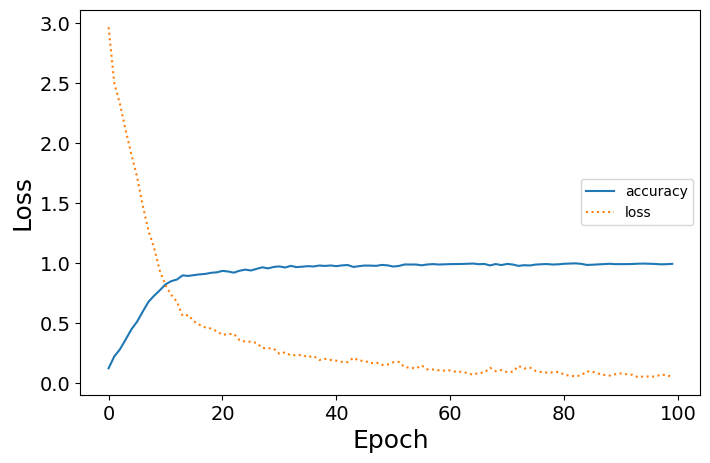

In [16]:
# plot graph epoch/loss during training
from matplotlib import pyplot

pyplot.gcf().set_size_inches(8,5)
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['loss'], linestyle='dotted', label='loss')
pyplot.legend(loc="right")
pyplot.xlabel("Epoch", fontsize=18)
pyplot.ylabel("Loss", fontsize=18)
ax = plt.gca()
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
pyplot.show()

In [17]:
SIZE = 256
#img = cv2.imread('/content/drive/MyDrive/mydata/desert/30.jpeg')
#img = cv2.imread('/content/drive/MyDrive/mydata/snow/3.jpeg')
img = cv2.imread('/content/drive/MyDrive/DATASETS/Cat Angry/02.jpg')
img = cv2.resize(img, (SIZE, SIZE))
img = np.expand_dims(img, axis=0)
print(model.predict(img))
print(le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[9.7208965e-01 1.0188426e-03 2.8059701e-03 5.5002997e-04 1.2663158e-03
  7.8333874e-04 1.8127827e-03 3.8192610e-04 3.8514156e-03 1.0894813e-03
  3.1069154e-04 1.1415058e-03 6.6654943e-04 1.0743281e-03 1.8337708e-03
  1.0073406e-03 6.4986100e-04 1.3377398e-03 7.7698554e-04 8.4440224e-04
  4.0395392e-04 1.4617894e-03 6.3704577e-04 1.2747332e-03 9.2945294e-04]]
['Cat Angry' 'Cat Happy' 'Cat Sad' 'Cat Stress' 'Dog Angry' 'Dog Happy'
 'Dog Relaxed' 'Dog Sad' 'Dog Stress' 'Female Anger' 'Female Contempt'
 'Female Disgust' 'Female Fear' 'Female Happy' 'Female Neutral'
 'Female Sad' 'Female Surprised' 'Male Anger' 'Male Contempt'
 'Male Disgust' 'Male Fear' 'Male Happy' 'Male Neutral' 'Male Sad'
 'Male Surprised']
